In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.colors import LogNorm
import pysindy as ps


### Fig. 3 a)

In [2]:
# 1. Define the vector field
def vector_field_circle(Y, a=0.2, t=0):
    x, y = Y
    r = np.sqrt(x**2 + y**2)
    f_r = 1
    g_r = 1

    dx = -y*(1 + f_r)
    dy = x*(1 + g_r)
    
    return [dx, dy]

# 2. Sample trajectories
Y0_circle = [np.sqrt(2)/2, np.sqrt(2)/2]
time = np.linspace(0, 10, 2000)
trajectory_circle = odeint(vector_field_circle, Y0_circle, time)

In [3]:
# Define multiple initial conditions
Y0 = [np.sqrt(2)/2, np.sqrt(2)/2]  # Add more if needed
# Time settings
time = np.linspace(0, 100, 10000)
dt = time[1] - time[0]

# Collect all trajectories
all_trajectories = []

trajectory = odeint(vector_field_circle, Y0, time)

In [4]:
def vector_field(Y, t=0):
    X, Y = Y
    dx = X + X * (X**2 + Y**2 - 1) * (4 * X**2 - 4 * X * Y + 4 * Y**2) + (X**2 + Y**2) * (-2 * X + 2 * Y + X**3 + X * Y**2)
    dy = Y + Y * (X**2 + Y**2 - 1) * (4 * X**2 - 4 * X * Y + 4 * Y**2) + (X**2 + Y**2) * (-2 * X - 2 * Y + Y**3 + X**2 * Y)
    return [dx, dy]


# Define multiple initial conditions
Y0 = [0.6, 0.4]  # Add more if needed
# Time settings
time = np.linspace(0, 100, 10000)
dt = time[1] - time[0]

# Collect all trajectories
all_trajectories = []


trajectory = odeint(vector_field, Y0, time)

# Create and fit the SINDy model
optimizer = ps.STLSQ(threshold=0.01)
feature_library = ps.PolynomialLibrary(degree=6)
model = ps.SINDy(optimizer=optimizer, feature_library=feature_library)
model.fit(trajectory, t=dt)

# Print coefficients and features
print("Coefficients:\n", model.coefficients())
print("Features:\n", model.get_feature_names())

Coefficients:
 [[ 9.50933583e-04  9.95789752e-01 -5.42157179e-03 -2.44627684e-02
   3.73601960e-03 -6.01405490e-02 -5.92174629e+00  5.99275808e+00
  -5.92132197e+00  1.99730590e+00  5.41935501e-02 -4.19491549e-02
   4.31046204e-01 -1.78078012e-01  4.27319913e-01  4.75303621e+00
  -3.75271091e+00  9.25452784e+00 -3.48709673e+00  4.48237434e+00
   1.90579289e-01  1.17097009e-01 -1.75055976e-01  0.00000000e+00
   1.12540631e-02 -8.32746450e-01  3.64430461e-01 -6.60355941e-01]
 [ 1.93107855e-03 -4.70385701e-03  9.93520295e-01 -3.39262961e-02
   1.47678138e-02 -7.39546388e-02 -1.91429043e+00 -5.99964462e+00
   2.08110145e+00 -5.98956956e+00  7.77536676e-02 -1.15480425e-01
   5.43210340e-01 -2.80788347e-01  4.86845335e-01 -2.69214591e-01
   5.24477783e+00 -4.77607723e+00  1.04648494e+01 -4.51207780e+00
   5.15006604e+00  1.11716566e-01 -7.24052695e-02 -1.68011516e-01
   3.42638040e-01 -1.10901334e+00  5.83749435e-01 -7.32388362e-01]]
Features:
 ['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^

In [5]:
# Create and fit the SINDy model
optimizer = ps.STLSQ(threshold=0.3)
feature_library = ps.PolynomialLibrary(degree=2)
model_circle = ps.SINDy(optimizer=optimizer, feature_library=feature_library)
model_circle.fit(trajectory_circle, t=dt)

# Print coefficients and features
print("Coefficients:\n", model_circle.coefficients())
print("Features:\n", model_circle.get_feature_names())

Coefficients:
 [[ 0.          0.         -1.00038356  0.          0.          0.        ]
 [ 0.          1.00038353  0.          0.          0.          0.        ]]
Features:
 ['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']


In [6]:
plt.rcParams.update({'font.size': 20})

# 4. Define the learned vector field for plotting
def learned_vector_field(Y, t=0):
    return model.predict(np.array([Y]))[0]

def learned_vector_field_circle(Y, t=0):
    return model_circle.predict(np.array([Y]))[0]

color_map="coolwarm"

# 5. Visualization using matplotlib streamplot
x = np.linspace(-2, 2, 32)
y = np.linspace(-2, 2, 32)
X, Y = np.meshgrid(x, y)
U_original, V_original = np.zeros(X.shape), np.zeros(Y.shape)
U_learned, V_learned = np.zeros(X.shape), np.zeros(Y.shape)
U_learned_circle, V_learned_circle = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(len(x)):
    for j in range(len(y)):
        dx, dy = vector_field([X[i,j], Y[i,j]])
        U_original[i, j], V_original[i, j] = dx, dy
    
        dx_learned, dy_learned = learned_vector_field([X[i,j], Y[i,j]])
        U_learned[i, j], V_learned[i, j] = dx_learned, dy_learned
    
        dx_learned_circle, dy_learned_circle = learned_vector_field_circle([X[i,j], Y[i,j]])
        U_learned_circle[i, j], V_learned_circle[i, j] = dx_learned_circle, dy_learned_circle
        


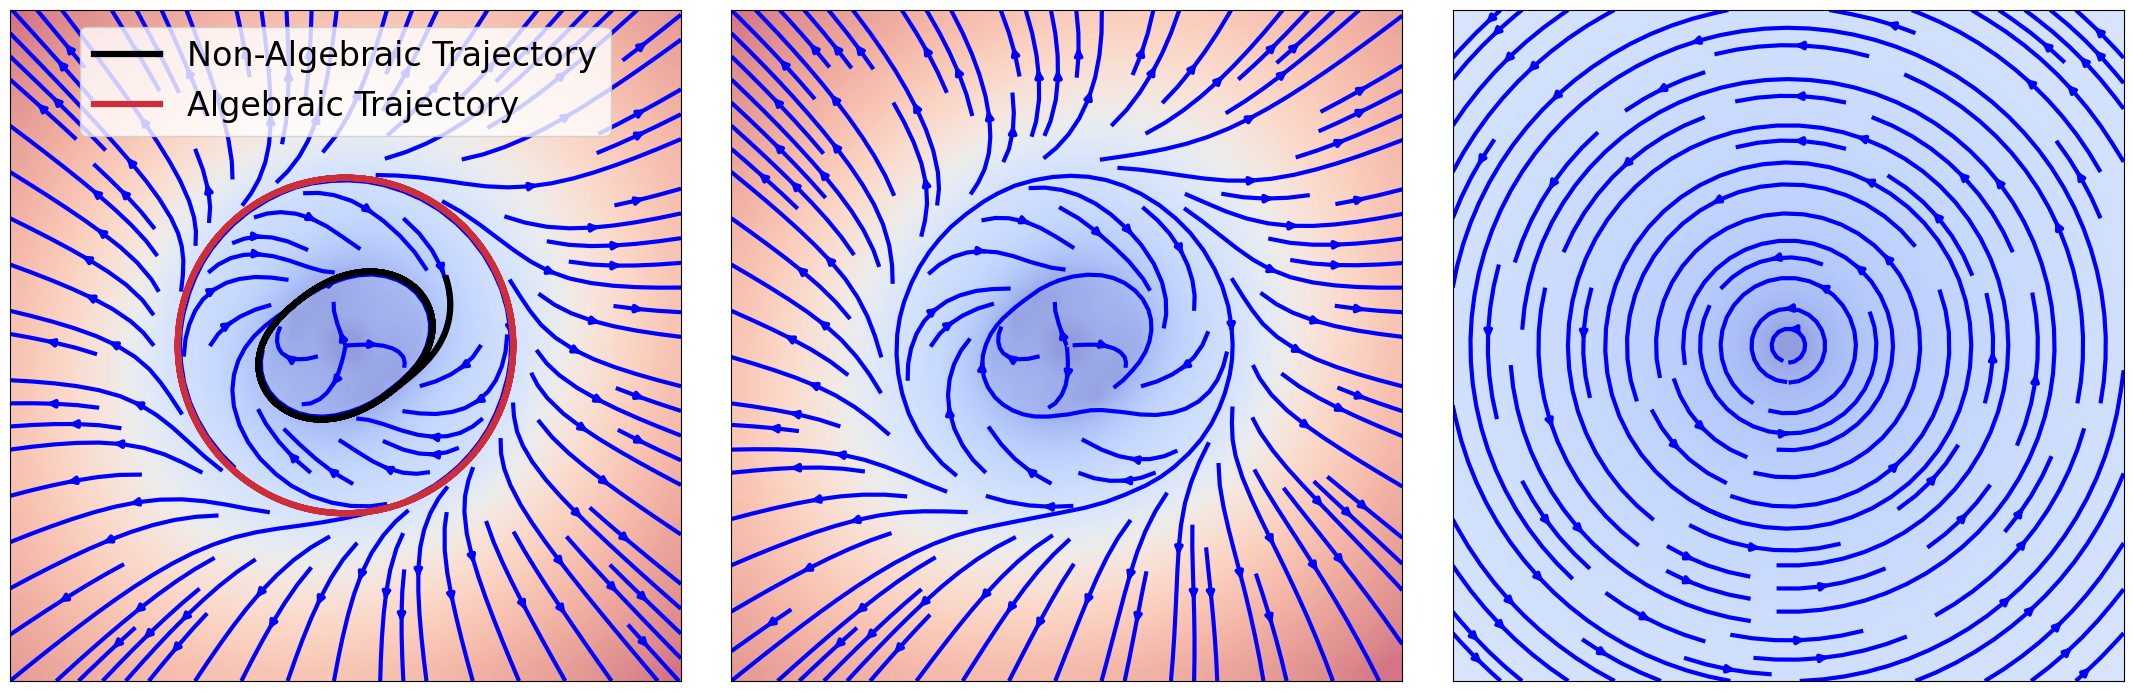

In [7]:
#Final plot

plt.figure(figsize=(22, 17))
plt.rcParams.update({'font.size': 24})
from matplotlib.ticker import MaxNLocator


plt.rcParams["lines.linewidth"] = 3.0

red = (206/255, 46/255, 57/255)
blue = (49/255, 81/255, 129/255)


ax=plt.subplot(1, 3, 1)
plt.streamplot(X, Y, U_original, V_original, color="blue")
#plt.title("Original Vector Field")

plt.plot(trajectory[:,0], trajectory[:,1], color="black", linewidth=4.5, label="Non-Algebraic Trajectory")
plt.plot(trajectory_circle[:,0], trajectory_circle[:,1], color=red, linewidth=4.5, label="Algebraic Trajectory")

ax.yaxis.set_major_locator(MaxNLocator(3)) 
ax.xaxis.set_major_locator(MaxNLocator(3)) 
plt.legend(loc="upper center")
magnitude1 = np.sqrt((U_original)**2 + (V_original)**2)
log_norm = LogNorm(vmin=magnitude1.min(), vmax=magnitude1.max())
c = plt.imshow(magnitude1, interpolation='bilinear', origin='lower', 
               cmap=color_map, alpha=0.55, norm=log_norm, extent=[X.min(), X.max(), Y.min(), Y.max()])
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 


ax=plt.subplot(1, 3, 2)
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_major_locator(MaxNLocator(3)) 
plt.streamplot(X, Y, U_learned, V_learned, color="blue")
#plt.title("Learned Vector Field")
magnitude2 = np.sqrt((U_learned)**2 + (V_learned)**2)
c = plt.imshow(magnitude2, interpolation='bilinear', origin='lower', 
               cmap=color_map, alpha=0.55, norm=log_norm, extent=[X.min(), X.max(), Y.min(), Y.max()])
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

ax=plt.subplot(1, 3, 3)
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_major_locator(MaxNLocator(3)) 
plt.streamplot(X, Y, U_learned_circle, V_learned_circle, color="blue")
#plt.title("Learned Vector Field")
magnitude2 = np.sqrt((U_learned_circle)**2 + (V_learned_circle)**2)
c = plt.imshow(magnitude2, interpolation='bilinear', origin='lower', 
               cmap=color_map, alpha=0.55, norm=log_norm, extent=[X.min(), X.max(), Y.min(), Y.max()])
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 


plt.tight_layout()

plt.savefig("sindy_cycles.png")
plt.show()

### Fig. 3 b)

In [14]:
def vector_field(Y, t=0):
    X, Y = Y
    dx = Y
    dy = -1/2 * Y- X * (-1 + 1/10*X**2)
    return [dx, dy]


# Define multiple initial conditions
Y0 = [1.2, 3.4]  # Add more if needed
# Time settings
time = np.linspace(0, 100, 10000)
dt = time[1] - time[0]

# Collect all trajectories
all_trajectories = []


trajectory = odeint(vector_field, Y0, time)

# Create and fit the SINDy model
optimizer = ps.STLSQ(threshold=0.01)
feature_library = ps.PolynomialLibrary(degree=3)
model = ps.SINDy(optimizer=optimizer, feature_library=feature_library)
model.fit(trajectory, t=dt)

# Print coefficients and features
print("Coefficients:\n", model.coefficients())
print("Features:\n", model.get_feature_names())

Coefficients:
 [[ 0.00000000e+00  0.00000000e+00  9.99974660e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.24312827e-03  1.00132557e+00 -4.99999840e-01 -4.75876424e-04
   0.00000000e+00  0.00000000e+00 -9.99428407e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Features:
 ['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


In [15]:
# Create and fit the SINDy model
optimizer = ps.STLSQ(threshold=0.2)
feature_library = ps.PolynomialLibrary(degree=2)
model_circle = ps.SINDy(optimizer=optimizer, feature_library=feature_library)
model_circle.fit(trajectory, t=dt)

# Print coefficients and features
print("Coefficients:\n", model_circle.coefficients())
print("Features:\n", model_circle.get_feature_names())

Coefficients:
 [[ 0.          0.          0.99997466  0.          0.          0.        ]
 [-2.65964971  3.80869479 -0.49281529 -0.93851716  0.          0.        ]]
Features:
 ['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']


In [16]:
plt.rcParams.update({'font.size': 20})

# 4. Define the learned vector field for plotting
def learned_vector_field(Y, t=0):
    return model.predict(np.array([Y]))[0]

def learned_vector_field_circle(Y, t=0):
    return model_circle.predict(np.array([Y]))[0]

color_map="coolwarm"

# 5. Visualization using matplotlib streamplot
x = np.linspace(-7, 7, 100)
y = np.linspace(-7, 7, 100)
X, Y = np.meshgrid(x, y)
U_original, V_original = np.zeros(X.shape), np.zeros(Y.shape)
U_learned, V_learned = np.zeros(X.shape), np.zeros(Y.shape)
U_learned_circle, V_learned_circle = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(len(x)):
    for j in range(len(y)):
        dx, dy = vector_field([X[i,j], Y[i,j]])
        U_original[i, j], V_original[i, j] = dx, dy
    
        dx_learned, dy_learned = learned_vector_field([X[i,j], Y[i,j]])
        U_learned[i, j], V_learned[i, j] = dx_learned, dy_learned
    
        dx_learned_circle, dy_learned_circle = learned_vector_field_circle([X[i,j], Y[i,j]])
        U_learned_circle[i, j], V_learned_circle[i, j] = dx_learned_circle, dy_learned_circle
        



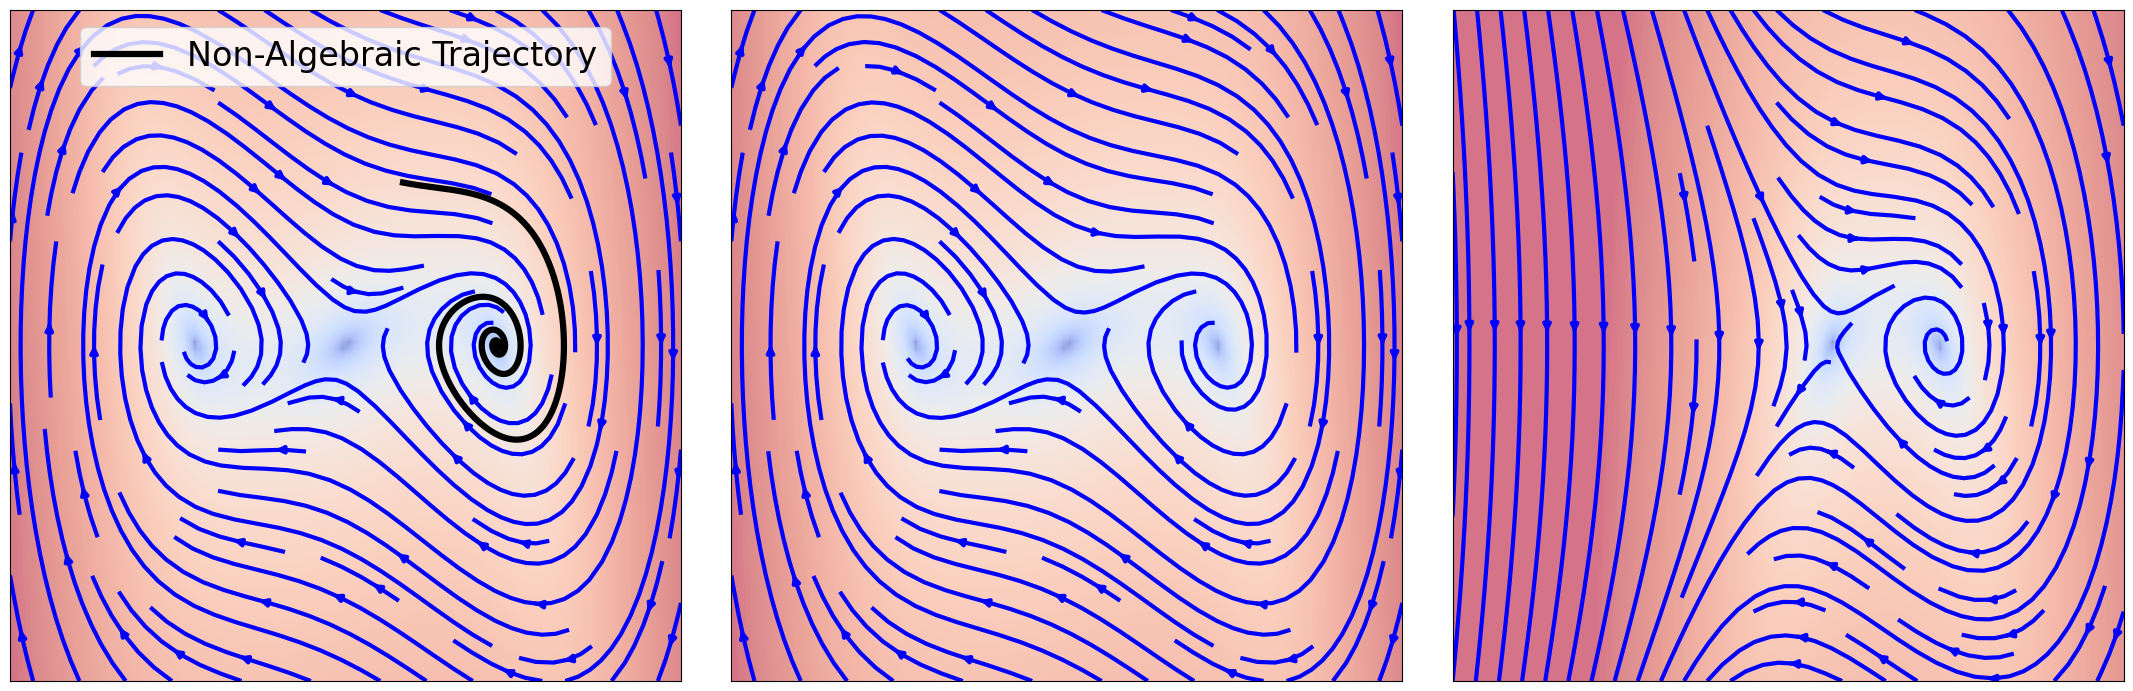

In [17]:
#Final plot
plt.figure(figsize=(22, 17))
plt.rcParams.update({'font.size': 24})
from matplotlib.ticker import MaxNLocator


plt.rcParams["lines.linewidth"] = 3.0

red = (206/255, 46/255, 57/255)
blue = (49/255, 81/255, 129/255)


ax=plt.subplot(1, 3, 1)
plt.streamplot(X, Y, U_original, V_original, color="blue")
#plt.title("Original Vector Field")

plt.plot(trajectory[:,0], trajectory[:,1], color="black", linewidth=4.5, label="Non-Algebraic Trajectory")
#plt.plot(trajectory_circle[:,0], trajectory_circle[:,1], color=red, linewidth=4., label="Algebraic Trajectory")

ax.yaxis.set_major_locator(MaxNLocator(3)) 
ax.xaxis.set_major_locator(MaxNLocator(3)) 
plt.legend(loc="upper center")
magnitude1 = np.sqrt((U_original)**2 + (V_original)**2)
log_norm = LogNorm(vmin=magnitude1.min(), vmax=magnitude1.max())
c = plt.imshow(magnitude1, interpolation='bilinear', origin='lower', 
               cmap=color_map, alpha=0.55, norm=log_norm, extent=[X.min(), X.max(), Y.min(), Y.max()])

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

ax=plt.subplot(1, 3, 2)
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_major_locator(MaxNLocator(3)) 
plt.streamplot(X, Y, U_learned, V_learned, color="blue")
#plt.title("Learned Vector Field")
magnitude2 = np.sqrt((U_learned)**2 + (V_learned)**2)
c = plt.imshow(magnitude2, interpolation='bilinear', origin='lower', 
               cmap=color_map, alpha=0.55, norm=log_norm, extent=[X.min(), X.max(), Y.min(), Y.max()])
#plt.plot(trajectory_rec[:,0], trajectory_rec[:,1], color="black", linewidth=4.0, label="Training Data")
#plt.title("Reconstruction from Non-Algebraic Solution")
#plt.legend(loc="upper center")
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
ax=plt.subplot(1, 3, 3)
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.xaxis.set_major_locator(MaxNLocator(3)) 
plt.streamplot(X, Y, U_learned_circle, V_learned_circle, color="blue")
#plt.title("Learned Vector Field")
magnitude2 = np.sqrt((U_learned_circle)**2 + (V_learned_circle)**2)
c = plt.imshow(magnitude2, interpolation='bilinear', origin='lower', 
               cmap=color_map, alpha=0.55, norm=log_norm, extent=[X.min(), X.max(), Y.min(), Y.max()])

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.tight_layout()
plt.savefig("sindy_cycles.png")
plt.show()